In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import copy

### Feeds

In [2]:
# checking feeds

feeds = pd.read_csv('feeds.csv', index_col=0)
feeds

,id,name
0,27a87df4-da75-451f-b8f6-af9dd0a4ee00,music
1,42568c8a-efbe-4293-81a3-513e33094ade,fashion
2,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,sports
3,c9d59470-c4ee-43ff-831d-b52508c8d848,games
4,582520b2-b30a-4ecb-b1b4-1806672fcfc4,travel
5,a8a04865-55d4-4de4-8141-b273b678299f,fun
6,644a3cb6-e266-4757-9e96-a3ee049216fe,jokes
7,da6c201f-8e50-433c-b2ad-614e42fac047,love
8,8078efe7-5bae-4528-9a66-b85904cc73ac,dance
9,30134b9e-1b79-43fb-b0c5-373af9237b2c,beaches


In [3]:
# seems to be nothing to analyze as there is only a name and its associate ID
# check other tables for possible association

### Videos

In [4]:
# checking videos

videos = pd.read_csv('videos.csv', index_col=0)
videos

,id,attribute_id,music_id,animation_id,duration,creator,created_at,num_shares,game_id,is_ar
0,6e884071-8c0e-4782-aa40-e0fd78243360,4712e9e6-bef1-4646-b21e-ca5336901bf9,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,17dab81c-6180-4a4b-b539-91978a726cfd,5.34,73ec1ac2-d148-45ac-94a8-9bdff51730d7,2021-08-04 10:42:39,12,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,True
1,ac90ff16-24b4-46bc-ae72-2da847f9e6c9,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,4ee0de5b-e27f-4d73-a3c6-52cf26e36c54,6d7a0545-0bca-4bf4-a306-931e57d8ffe2,3.88,0230f9af-e89f-4886-8322-52a38eaf991c,2021-11-27 10:06:43,3,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
2,fb5eaf0d-e72c-4523-b5c5-4d9c323cef5f,80f5b187-f6e6-40f2-9b6e-fe62b67049a8,d53234f4-1efb-4299-97c1-11658118cba5,716c02df-bd3a-41c9-b2be-86fb74ff3255,5.15,fbf93fbf-a935-436f-8516-8acb863e779f,2021-02-26 04:18:53,4,6ca0f645-a16b-42b0-9dc2-2ae952c83591,True
3,bbf89dcb-7fbd-439d-9a7d-36ef7a1c2aa3,02b2b662-1b39-4d91-9417-dddc9451d8e1,19e4db13-d854-4913-a8ca-3612ee1a6071,b7bd5204-2976-4eb0-ab71-508a848bc325,6.50,f7a2adb8-44d7-4408-a2a9-3a593fc6d626,2021-11-27 02:08:02,9,8bd4c7be-fe87-45ad-990d-d131cd3d9c77,False
4,4c613ec6-fa6f-47e8-b4ab-658e2f6a644d,06c496ee-e884-42f9-ba39-010a66ed5296,b5b679a5-e769-4d95-82a6-f75e439b1ef9,17dab81c-6180-4a4b-b539-91978a726cfd,4.38,d9f9538f-1b7e-4f35-805d-924b309d75d8,2021-11-17 11:06:32,14,2609b6b5-3a08-451e-bce5-75fe506559d2,False
...,...,...,...,...,...,...,...,...,...,...
4995,f6fec2d4-77d6-46ea-b41c-d97154bd5238,e339ba35-ffef-403b-a17c-dd218fdbb915,19e4db13-d854-4913-a8ca-3612ee1a6071,ff1a548b-e307-474c-a405-6370ca1a0639,3.82,4db64146-3864-40d1-9908-faa3f4a04a80,2021-11-08 04:21:06,2,6ca0f645-a16b-42b0-9dc2-2ae952c83591,False
4996,f90ef4f1-b5ab-431e-9fc8-cf7359138168,06c496ee-e884-42f9-ba39-010a66ed5296,8ff50feb-3b5d-4dd0-84b0-8409753bd166,08dda558-a151-45a2-8e43-1ba6f2891800,5.64,4bcc7557-3760-49e3-895a-f122d9d112f1,2021-09-11 23:29:23,18,66653b7c-b600-49b3-a58c-d1862e91d426,False
4997,ad00eac6-19d5-48f9-bed7-066b77546191,4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e,e2bf5d12-edc2-47cb-b23f-1f4f7c1a2292,ff1a548b-e307-474c-a405-6370ca1a0639,4.72,0ef242cf-8c59-45d7-acfc-dadce146c907,2021-11-22 16:46:18,4,66653b7c-b600-49b3-a58c-d1862e91d426,False
4998,1100779d-e85f-4836-a154-3b4d543f910c,25e7fab9-abfb-4a74-a8cb-c3adbc6e3531,da2fc9b0-32d5-4a1b-8b40-2706eb133bf0,ace4c5e2-ef86-429a-aad3-23bef7a1c9f1,6.44,9b8274ec-0e8f-47fb-8b16-07e1ec115798,2021-07-09 18:02:48,8,2609b6b5-3a08-451e-bce5-75fe506559d2,False


In [5]:
# separating out year, month, and month_year

# converting created_at feature to datetime for ease of use
videos['dateTime'] = pd.DatetimeIndex(videos['created_at'])

# get the year and month to see what the breakdown is by year
# videos['year'] = videos['dateTime'].dt.year
videos['month'] = videos['dateTime'].dt.month
# videos['m_y'] = videos['datetime'].dt.strftime('%m-%Y')

# number of new videos per month broken down by year
videos[['month']].value_counts().sort_index()

# shows relatively increasing trend

month
1          16
2          45
3         109
4         150
5         209
6         231
7         364
8         453
9         595
10        804
11       1108
12        916
dtype: int64

In [6]:
for i in range(len(videos.columns)):
    print(f'There are {videos[videos.columns[i]].nunique()} unique IDs in {videos.columns[i]}\n')

There are 5000 unique IDs in id

There are 11 unique IDs in attribute_id

There are 10 unique IDs in music_id

There are 15 unique IDs in animation_id

There are 491 unique IDs in duration

There are 992 unique IDs in creator

There are 5000 unique IDs in created_at

There are 21 unique IDs in num_shares

There are 5 unique IDs in game_id

There are 2 unique IDs in is_ar

There are 5000 unique IDs in dateTime

There are 12 unique IDs in month



In [7]:
v_sub = videos[['attribute_id', 'music_id', 'animation_id', 'creator', 'game_id', 'is_ar', 'month']]

In [8]:
v_sub['attribute_id'].value_counts()
# there may be attributes that are more popular

# should check w months

25e7fab9-abfb-4a74-a8cb-c3adbc6e3531    483
c3328117-4129-4d8b-8250-9479e9c6a389    474
7ef48c9e-776d-4d24-8c2b-e3675b295767    466
80f5b187-f6e6-40f2-9b6e-fe62b67049a8    465
4f91d2b6-bf42-4d3f-a8e8-acc3b07f647e    463
4712e9e6-bef1-4646-b21e-ca5336901bf9    460
06c496ee-e884-42f9-ba39-010a66ed5296    447
02b2b662-1b39-4d91-9417-dddc9451d8e1    442
3390e253-7815-4a3c-8169-fd2ab532e166    439
e339ba35-ffef-403b-a17c-dd218fdbb915    435
30fa7949-1cb6-44b1-9c7b-42c7421fc504    426
Name: attribute_id, dtype: int64

In [9]:
v_sub['music_id'].value_counts()
# there may be songs that are more popular

# should check w months

c3721b09-6896-465a-8e13-4d73efd06874    550
b5b679a5-e769-4d95-82a6-f75e439b1ef9    548
19e4db13-d854-4913-a8ca-3612ee1a6071    512
8ff50feb-3b5d-4dd0-84b0-8409753bd166    509
da2fc9b0-32d5-4a1b-8b40-2706eb133bf0    491
3de11516-8627-47c3-98ab-265b429cac91    488
d53234f4-1efb-4299-97c1-11658118cba5    481
4ee0de5b-e27f-4d73-a3c6-52cf26e36c54    475
e2bf5d12-edc2-47cb-b23f-1f4f7c1a2292    474
1f80192e-3bff-41b8-b272-7062b9d7b6de    472
Name: music_id, dtype: int64

In [10]:
v_sub['animation_id'].value_counts()

d167d0af-a662-48ad-bb39-5aa306fc8141    359
6d7a0545-0bca-4bf4-a306-931e57d8ffe2    355
435320a3-8d3d-4a9d-b76b-2f2e268f7619    346
4cfc4892-2c7e-46e3-8399-5b138285d394    345
716c02df-bd3a-41c9-b2be-86fb74ff3255    340
542d7532-e88a-48ca-826f-c11f0f615bc4    340
b5349df0-23dd-4973-b47d-ae5df5a4e247    340
b7bd5204-2976-4eb0-ab71-508a848bc325    337
ace4c5e2-ef86-429a-aad3-23bef7a1c9f1    335
ff1a548b-e307-474c-a405-6370ca1a0639    333
17dab81c-6180-4a4b-b539-91978a726cfd    330
2029f213-1719-4108-8125-25d465cf475d    325
ab5dc9f1-deb4-44d4-88ff-62e473a060f4    315
7410fff9-7a21-4c93-8a54-a6f4c9e55b04    309
08dda558-a151-45a2-8e43-1ba6f2891800    291
Name: animation_id, dtype: int64

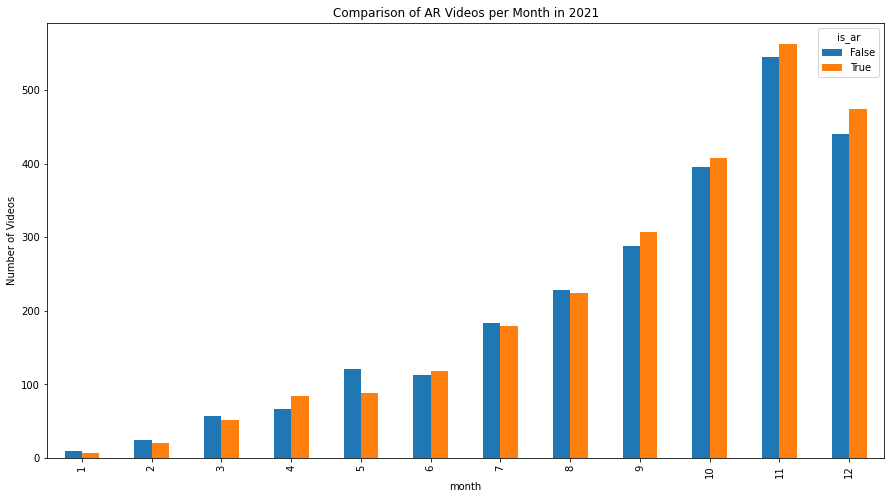

In [11]:
# unstacked bar plot of videos where ar is used and not used

v_sub.groupby(['is_ar', 'month'])['month'].count().unstack('is_ar').plot(kind='bar', figsize=(15,8))
plt.title('Comparison of AR Videos per Month in 2021')
plt.ylabel('Number of Videos')
plt.show()

# we see here that both seem to be increasing

In [12]:
v_sub[v_sub['is_ar']==True]['month'].value_counts().sort_index()

1       7
2      21
3      52
4      84
5      88
6     118
7     180
8     225
9     307
10    408
11    563
12    475
Name: month, dtype: int64

Text(0, 0.5, 'Number of New AR Videos')

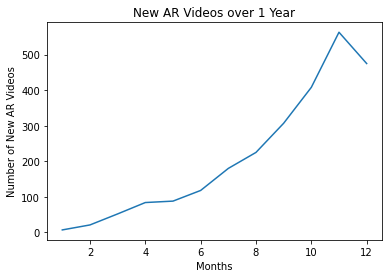

In [13]:
# A line graph to see the time series graph 

months_list = list(range(1, 13))

# get the count of new ar videos by month sorting by index
ar_true_count = v_sub[v_sub['is_ar']==True]['month'].value_counts().sort_index()

# creating a list from above to pass into mk test
ar_true_list = list(ar_true_count)

# plot the time-series graph
plt.plot(months_list, ar_true_list)
plt.title('New AR Videos over 1 Year')
plt.xlabel('Months')
plt.ylabel('Number of New AR Videos')

In [14]:
# testing significance of possible trends using mann-kendall test

import pymannkendall as mk

# run the mk test
df_ar_true = pd.DataFrame(mk.original_test(ar_true_list))

# Creating a dataframe of the mk test stats for easy viewing
mk_labels = ['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']
df_ar_true.columns = ['Statistics']
df_ar_true['Label'] = mk_labels
df_ar_true = df_ar_true.set_index('Label')
df_ar_true

,Statistics
Label,
trend,increasing
h,True
p,0.000016
z,4.320071
Tau,0.969697
s,64.0
var_s,212.666667
slope,45.533333
intercept,-101.433333


Text(0, 0.5, 'Number of New AR Videos')

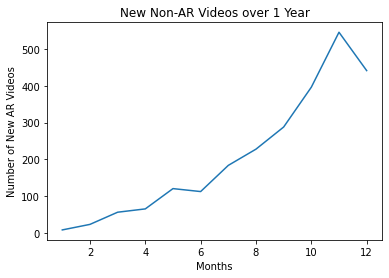

In [15]:
# A line graph to see the time series graph 

months_list = list(range(1, 13))

# get the count of new non-ar videos by month sorting by index
ar_false_count = v_sub[v_sub['is_ar']==False]['month'].value_counts().sort_index()

# creating a list from above to pass into mk test
ar_false_list = list(ar_false_count)

# plot the time-series graph
plt.plot(months_list, ar_false_list)
plt.title('New Non-AR Videos over 1 Year')
plt.xlabel('Months')
plt.ylabel('Number of New AR Videos')

In [16]:
# testing significance of possible trends using mann-kendall test

# run the mk test
df_ar_false = pd.DataFrame(mk.original_test(ar_false_list))

# Creating a dataframe of the mk test stats for easy viewing
mk_labels = ['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']
df_ar_false.columns = ['Statistics']
df_ar_false['Label'] = mk_labels
df_ar_false = df_ar_false.set_index('Label')
df_ar_false

,Statistics
Label,
trend,increasing
h,True
p,0.000029
z,4.182925
Tau,0.939394
s,62.0
var_s,212.666667
slope,42.833333
intercept,-83.083333


In [17]:
# based on the above slopes, it seems that AR videos' growth may outpace non-AR growth slightly

### Watched Video

In [18]:
# checking videos

watched = pd.read_csv('watchedVideo.csv', index_col=0)
watched

,coordinates,os,duration,videoId,userId,appVersion,dateTime,feedId
0,"(Decimal('14.439490'), Decimal('105.291233'))",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,30134b9e-1b79-43fb-b0c5-373af9237b2c
1,"(Decimal('40.866935'), Decimal('-73.845013'))",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,8078efe7-5bae-4528-9a66-b85904cc73ac
2,"(Decimal('48.666850'), Decimal('9.359456'))",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1
3,"(Decimal('5.172365'), Decimal('-74.439009'))",Android,2.81,8ffc47e3-32ce-4d24-a990-9baac556603b,960fb90e-eddc-478a-a64a-04b9dded3a05,2.1.2,2021-12-04 21:02:50,42568c8a-efbe-4293-81a3-513e33094ade
4,"(Decimal('4.063707'), Decimal('9.606159'))",iOS,5.88,47e70477-7511-4bd0-801b-1651f951002f,1ce0c003-25e7-473f-8796-0fe04d6c275c,2.1.2,2021-11-28 16:12:39,582520b2-b30a-4ecb-b1b4-1806672fcfc4
...,...,...,...,...,...,...,...,...
49995,"(Decimal('26.318764'), Decimal('68.257897'))",iOS,3.06,bfd82a3f-48ce-4fa2-9ac3-02f422936017,0230f9af-e89f-4886-8322-52a38eaf991c,2.2.4,2021-10-13 04:58:05,42568c8a-efbe-4293-81a3-513e33094ade
49996,"(Decimal('8.891013'), Decimal('-13.246846'))",iOS,1.01,e4c54724-4b9b-4924-bd46-d1bcdf0a77d0,c240b902-021a-4c1b-885d-11e3b829f0e7,2.2.2,2021-10-17 04:29:19,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1
49997,"(Decimal('13.362063'), Decimal('78.721593'))",iOS,5.66,396b12f5-b33e-436b-a59d-794b3c37662d,4ce5c56a-faa7-4cb5-bcff-38a4290fc688,2.2.4,2021-12-06 18:20:18,30134b9e-1b79-43fb-b0c5-373af9237b2c
49998,"(Decimal('35.573808'), Decimal('-91.401677'))",iOS,0.63,f71851b1-cfb8-4459-aedc-d14c3e01d7ca,0ad99cde-6ca2-475e-88b8-ad81281c05ac,3.0.0,2021-11-23 10:05:22,30134b9e-1b79-43fb-b0c5-373af9237b2c


In [19]:
feeds.name

0      music
1    fashion
2     sports
3      games
4     travel
5        fun
6      jokes
7       love
8      dance
9    beaches
Name: name, dtype: object

In [20]:
# checking for any matches between feed id and other ids in videos db just in case
# (would have preferred to use SQL join, but do not have a SQL database to use at this time)

for i in range(0, len(feeds.id)):
    
    print(f'The count of {feeds.id[i]} is {np.sum(watched.feedId==feeds.id[i])}')

The count of 27a87df4-da75-451f-b8f6-af9dd0a4ee00 is 4978
The count of 42568c8a-efbe-4293-81a3-513e33094ade is 5116
The count of 6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1 is 5017
The count of c9d59470-c4ee-43ff-831d-b52508c8d848 is 4989
The count of 582520b2-b30a-4ecb-b1b4-1806672fcfc4 is 5104
The count of a8a04865-55d4-4de4-8141-b273b678299f is 4974
The count of 644a3cb6-e266-4757-9e96-a3ee049216fe is 4976
The count of da6c201f-8e50-433c-b2ad-614e42fac047 is 4939
The count of 8078efe7-5bae-4528-9a66-b85904cc73ac is 5012
The count of 30134b9e-1b79-43fb-b0c5-373af9237b2c is 4895


In [21]:
feeds

,id,name
0,27a87df4-da75-451f-b8f6-af9dd0a4ee00,music
1,42568c8a-efbe-4293-81a3-513e33094ade,fashion
2,6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1,sports
3,c9d59470-c4ee-43ff-831d-b52508c8d848,games
4,582520b2-b30a-4ecb-b1b4-1806672fcfc4,travel
5,a8a04865-55d4-4de4-8141-b273b678299f,fun
6,644a3cb6-e266-4757-9e96-a3ee049216fe,jokes
7,da6c201f-8e50-433c-b2ad-614e42fac047,love
8,8078efe7-5bae-4528-9a66-b85904cc73ac,dance
9,30134b9e-1b79-43fb-b0c5-373af9237b2c,beaches


In [22]:
# for i in range(len(feeds.id)):
#     watched.loc[watched.feedId==feeds.id[i], 'feedId'] = feeds[feeds.id==feeds.id[i]]['name']

# watched

In [23]:
# changing the feed id to something more coherent (for loop above was not working so had to resort to manual changes)

watched.loc[watched.feedId=='27a87df4-da75-451f-b8f6-af9dd0a4ee00', 'feedId']='music'
watched.loc[watched.feedId=='42568c8a-efbe-4293-81a3-513e33094ade', 'feedId']='fashion'
watched.loc[watched.feedId=='6894af29-56cc-4b4a-8ee6-be9b3cb3e7f1', 'feedId']='sports'
watched.loc[watched.feedId=='c9d59470-c4ee-43ff-831d-b52508c8d848', 'feedId']='games'
watched.loc[watched.feedId=='582520b2-b30a-4ecb-b1b4-1806672fcfc4', 'feedId']='travel'
watched.loc[watched.feedId=='a8a04865-55d4-4de4-8141-b273b678299f', 'feedId']='fun'
watched.loc[watched.feedId=='644a3cb6-e266-4757-9e96-a3ee049216fe', 'feedId']='jokes'
watched.loc[watched.feedId=='da6c201f-8e50-433c-b2ad-614e42fac047', 'feedId']='love'
watched.loc[watched.feedId=='8078efe7-5bae-4528-9a66-b85904cc73ac', 'feedId']='dance'
watched.loc[watched.feedId=='30134b9e-1b79-43fb-b0c5-373af9237b2c', 'feedId']='beaches'

watched

,coordinates,os,duration,videoId,userId,appVersion,dateTime,feedId
0,"(Decimal('14.439490'), Decimal('105.291233'))",iOS,3.95,722e110c-2f81-46aa-9c25-4d26fd77519f,317a2bc3-5f95-4d35-9a94-1f2f38424c4f,2.2.2,2021-08-04 09:39:07,beaches
1,"(Decimal('40.866935'), Decimal('-73.845013'))",iOS,5.95,cc10d153-37f9-42b5-8d78-2365908acf2b,db031c3d-69e4-4c06-91fe-e9be0a3c173c,2.2.1,2021-07-06 16:32:10,dance
2,"(Decimal('48.666850'), Decimal('9.359456'))",iOS,0.69,7f3f7fce-f2ec-4dfd-bac8-92dc7865a365,8fb18b66-f548-42a7-b394-c1be963cac29,2.2.0,2021-12-06 01:42:02,sports
3,"(Decimal('5.172365'), Decimal('-74.439009'))",Android,2.81,8ffc47e3-32ce-4d24-a990-9baac556603b,960fb90e-eddc-478a-a64a-04b9dded3a05,2.1.2,2021-12-04 21:02:50,fashion
4,"(Decimal('4.063707'), Decimal('9.606159'))",iOS,5.88,47e70477-7511-4bd0-801b-1651f951002f,1ce0c003-25e7-473f-8796-0fe04d6c275c,2.1.2,2021-11-28 16:12:39,travel
...,...,...,...,...,...,...,...,...
49995,"(Decimal('26.318764'), Decimal('68.257897'))",iOS,3.06,bfd82a3f-48ce-4fa2-9ac3-02f422936017,0230f9af-e89f-4886-8322-52a38eaf991c,2.2.4,2021-10-13 04:58:05,fashion
49996,"(Decimal('8.891013'), Decimal('-13.246846'))",iOS,1.01,e4c54724-4b9b-4924-bd46-d1bcdf0a77d0,c240b902-021a-4c1b-885d-11e3b829f0e7,2.2.2,2021-10-17 04:29:19,sports
49997,"(Decimal('13.362063'), Decimal('78.721593'))",iOS,5.66,396b12f5-b33e-436b-a59d-794b3c37662d,4ce5c56a-faa7-4cb5-bcff-38a4290fc688,2.2.4,2021-12-06 18:20:18,beaches
49998,"(Decimal('35.573808'), Decimal('-91.401677'))",iOS,0.63,f71851b1-cfb8-4459-aedc-d14c3e01d7ca,0ad99cde-6ca2-475e-88b8-ad81281c05ac,3.0.0,2021-11-23 10:05:22,beaches


In [24]:
# separating out year, month, and month_year

# converting created_at feature to datetime for ease of use
watched['dateTime'] = pd.DatetimeIndex(watched['dateTime'])

# get the year and month to see what the breakdown is by year
watched['year'] = watched['dateTime'].dt.year
watched['month'] = watched['dateTime'].dt.month
# watched['m_y'] = watched['datetime'].dt.strftime('%m-%Y')

# number of new watched per month broken down by year
watched[['year', 'month']].value_counts().sort_index()

year  month
2021  1            1
      2            8
      3           25
      4           80
      5          213
      6          385
      7          817
      8         1696
      9         3122
      10        6312
      11       14584
      12       22757
dtype: int64

## Music

In [44]:
# checking if all months are accounted for 

watched[watched['feedId']=='music']['month'].value_counts().sort_index()

3        6
4        2
5       23
6       36
7       73
8      163
9      339
10     611
11    1472
12    2253
Name: month, dtype: int64

In [43]:
list(watched[watched['feedId']=='music']['month'].value_counts().sort_index())

[6, 2, 23, 36, 73, 163, 339, 611, 1472, 2253]

Text(0, 0.5, 'Number of Music Videos Watched')

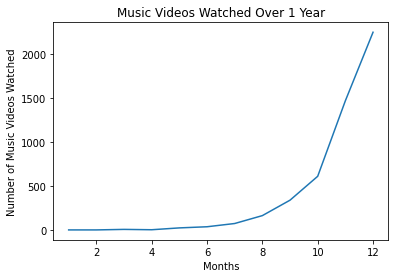

In [48]:
# A line graph to see the time series graph 

months_list = list(range(1, 13))

# get the count of new musics by month sorting by index
# watched_music = watched[watched['feedId']=='music']['month'].value_counts().sort_index()

# creating a list from above to pass into mk test
watched_music_list = [0, 0, 6, 2, 23, 36, 73, 163, 339, 611, 1472, 2253]

# plot the time-series graph
plt.plot(months_list, watched_music_list)
plt.title('Music Videos Watched Over 1 Year')
plt.xlabel('Months')
plt.ylabel('Number of Music Videos Watched')

In [49]:
# run the mk test
df_music = pd.DataFrame(mk.original_test(watched_music_list))

# Creating a dataframe of the mk test stats for easy viewing
mk_labels = ['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']
df_music.columns = ['Statistics']
df_music['Label'] = mk_labels
df_music = df_music.set_index('Label')
df_music

,Statistics
Label,
trend,increasing
h,True
p,0.00002
z,4.261529
Tau,0.954545
s,63.0
var_s,211.666667
slope,77.6875
intercept,-372.78125


## Fashion

In [50]:
# checking if all months are accounted for to adjust months_list below

watched[watched['feedId']=='fashion']['month'].value_counts().sort_index()

3        3
4       11
5       17
6       39
7       84
8      185
9      314
10     641
11    1448
12    2374
Name: month, dtype: int64

In [51]:
list(watched[watched['feedId']=='fashion']['month'].value_counts().sort_index())

[3, 11, 17, 39, 84, 185, 314, 641, 1448, 2374]

Text(0, 0.5, 'Number of Fashion Videos Watched')

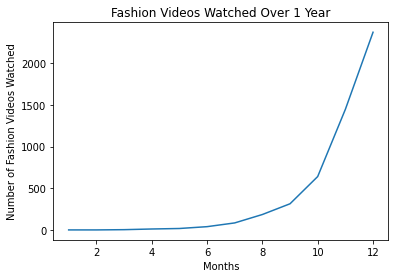

In [53]:
# A line graph to see the time series graph 

months_list = list(range(1, 13))

# get the count of new fashions by month sorting by index
# watched_fashion = watched[watched['feedId']=='fashion']['month'].value_counts().sort_index()

# creating a list from above to pass into mk test
watched_fashion_list = [0, 0, 3, 11, 17, 39, 84, 185, 314, 641, 1448, 2374]

# plot the time-series graph
plt.plot(months_list, watched_fashion_list)
plt.title('Fashion Videos Watched Over 1 Year')
plt.xlabel('Months')
plt.ylabel('Number of Fashion Videos Watched')

In [54]:
# run the mk test
df_fashion = pd.DataFrame(mk.original_test(watched_fashion_list))

# Creating a dataframe of the mk test stats for easy viewing
mk_labels = ['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']
df_fashion.columns = ['Statistics']
df_fashion['Label'] = mk_labels
df_fashion = df_fashion.set_index('Label')
df_fashion

,Statistics
Label,
trend,increasing
h,True
p,0.000011
z,4.398998
Tau,0.984848
s,65.0
var_s,211.666667
slope,77.1875
intercept,-363.03125


## Sports

In [34]:
# checking if all months are accounted for to adjust months_list below

watched[watched['feedId']=='sports']['month'].value_counts().sort_index()

1        1
2        2
4        8
5       17
6       31
7       79
8      164
9      308
10     659
11    1448
12    2300
Name: month, dtype: int64

In [40]:
list(watched[watched['feedId']=='sports']['month'].value_counts().sort_index())

[1, 2, 8, 17, 31, 79, 164, 308, 659, 1448, 2300]

Text(0, 0.5, 'Number of Sports Videos Watched')

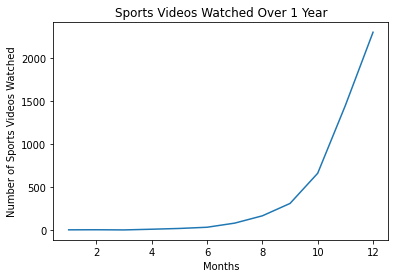

In [41]:
# A line graph to see the time series graph 

months_list = list(range(1, 13))

# get the count of new sportss by month sorting by index
# watched_sports = watched[watched['feedId']=='sports']['month'].value_counts().sort_index()

# creating a list from above to pass into mk test
watched_sports_list = [1, 2, 0, 8, 17, 31, 79, 164, 308, 659, 1448, 2300]

# plot the time-series graph
plt.plot(months_list, watched_sports_list)
plt.title('Sports Videos Watched Over 1 Year')
plt.xlabel('Months')
plt.ylabel('Number of Sports Videos Watched')

In [42]:
# run the mk test
df_sports = pd.DataFrame(mk.original_test(watched_sports_list))

# Creating a dataframe of the mk test stats for easy viewing
mk_labels = ['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']
df_sports.columns = ['Statistics']
df_sports['Label'] = mk_labels
df_sports = df_sports.set_index('Label')
df_sports

,Statistics
Label,
trend,increasing
h,True
p,0.000029
z,4.182925
Tau,0.939394
s,62.0
var_s,212.666667
slope,77.618056
intercept,-371.899306


In [55]:
# checking if all months are accounted for to adjust months_list below

watched[watched['feedId']=='games']['month'].value_counts().sort_index()

3        1
4        6
5       31
6       39
7       89
8      158
9      300
10     695
11    1456
12    2214
Name: month, dtype: int64

In [56]:
watched[watched['feedId']=='travel']['month'].value_counts().sort_index()

3        3
4        8
5       25
6       45
7       94
8      174
9      362
10     609
11    1481
12    2303
Name: month, dtype: int64

In [57]:
watched[watched['feedId']=='fun']['month'].value_counts().sort_index()

2        1
3        2
4        6
5       13
6       52
7       90
8      162
9      286
10     611
11    1455
12    2296
Name: month, dtype: int64

In [58]:
watched[watched['feedId']=='jokes']['month'].value_counts().sort_index()

3        2
4        5
5       20
6       38
7       88
8      158
9      302
10     635
11    1435
12    2293
Name: month, dtype: int64

In [59]:
watched[watched['feedId']=='love']['month'].value_counts().sort_index()

2        2
3        3
4        6
5       18
6       33
7       86
8      175
9      293
10     618
11    1469
12    2236
Name: month, dtype: int64

In [60]:
watched[watched['feedId']=='dance']['month'].value_counts().sort_index()

2        1
3        3
4       14
5       26
6       47
7       68
8      171
9      306
10     612
11    1503
12    2261
Name: month, dtype: int64

In [61]:
watched[watched['feedId']=='beaches']['month'].value_counts().sort_index()

2        2
3        2
4       14
5       23
6       25
7       66
8      186
9      312
10     621
11    1417
12    2227
Name: month, dtype: int64

In [ ]:
# 'music'
# 'fashion'
# 'sports'
# 'games'
# 'travel'
# 'fun'
# 'jokes'
# 'love'
# 'dance'
# 'beaches'